***
## Table of Contents
<br>
    <ol><h2><a href='#0' style="text-decoration : none; color : #000000;">0. Loading and Analyzing data of all three experiments</a></h2> </ol>
    <br>
    <ol>
        <h2><a href='#1' style="text-decoration : none; color : #000000;">1. Models with selected original features</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br> 

<ol>
        <h2><a href='#2' style="text-decoration : none; color : #000000;">2. Feature Transformation with feature selection </a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
     
 <ol>
        <h2><a href='#3' style="text-decoration : none; color : #000000;">3. Feature Transformation with PCA</a></h2>
        <ul>
            <a href='#3.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#3.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#3.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#4' style="text-decoration : none; color : #000000;">4. Oversampling</a></h2>
        <ul>
            <a href='#4.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#4.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#4.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#5' style="text-decoration : none; color : #000000;">5. Undersampling</a></h2>
        <ul>
            <a href='#5.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#5.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#5.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>
 <ol>
        <h2><a href='#6' style="text-decoration : none; color : #000000;">6. With Cookies</a></h2>
        <ul>
            <a href='#6.A' style="text-decoration : none; color : #000000;"><h3>A. Neural Networks using keras </h3></a>
        </ul>
        <ul>
            <a href='#6.B' style="text-decoration : none; color : #000000;"><h3>B. Random Forest Classifier </h3></a>
        </ul>
        <ul>
            <a href='#6.C' style="text-decoration : none; color : #000000;"><h3>C. Extra Tree Classifier  </h3></a>
        </ul>
     </ol>
     <br>

In [1]:
import pandas as pd
import numpy as np
import os
import json
from pandas.io.json import json_normalize
from IPython.display import display,clear_output,HTML
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

import researchpy as rp

%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',305)

from sklearn.feature_selection import SelectKBest,chi2,RFE,RFECV,f_regression,SelectFromModel
from sklearn.linear_model import LogisticRegression,RandomizedLasso,LinearRegression, Ridge,Lasso
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler,StandardScaler,binarize
from sklearn.ensemble import RandomForestRegressor
# from minepy import MINE
from sklearn import metrics

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,auc,roc_curve,recall_score,precision_score
from sklearn import metrics
from pandas_ml import ConfusionMatrix


from imblearn.over_sampling import SMOTE

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import featuretools as ft

from scipy import stats

Using TensorFlow backend.


In [2]:
### Function to plot Feature Importance
def feat_impt_plot(feat_impt,width_s=1000,height_s=1000,title=''):
    data = [go.Bar(x=feat_impt.values,y=feat_impt.index.values,text=np.round(feat_impt,4),
            textposition = 'outside',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5),
            ),
            opacity=0.6,
            orientation='h'
        )]
    layout = go.Layout(title=title,autosize=False,
    width=width_s,
    height=height_s,
    xaxis=dict(title='Feature Importances',
        tickfont=dict(
            size=12,
            color='black'
        )),
    yaxis=dict(automargin=True))
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    

### Function to generate Confusion Matrix
def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    return cm


### Function to eliminate columns with no values or only 1 unique values
def remove_feat(data):
    col_no_unique=[]
    for col in data.columns[:]:
        if len(data[col].value_counts())<=1:
#             print(col)
            col_no_unique.append(col)
    return col_no_unique


### Function to eliminate columns with more than 95% values 
def uni_value(data):
    lst=[]
    for col in data.columns[:]:
        lst.append([col,dict(data[col].value_counts()),data[col].value_counts().values[0]>=len(data)*0.95])
    col_values=pd.DataFrame(lst,columns=['Feature','Value_Counts','95_%_same_values'])
    col_values.set_index('Feature',drop=True,inplace=True)
    del lst
    return col_values


### Identify categorical and numerical data
def check_cat(data):
    cat_var=[]
    num_var=[]
    for col in data.columns:
        if col!='Target':
            if len(data[col].value_counts())==2:
                cat_var.append(col)
            else:
                num_var.append(col)
    return cat_var,num_var


### Generate statistics for numerical data
def num_stats(data,columns):
    lst=[]
    for col in columns:
        corr=stats.pointbiserialr(data[col],data.Target)[0]
        corr_p=stats.pointbiserialr(data[col],data.Target)[1]
        ttest=stats.ttest_ind(data[data.Target==1][col], data[data.Target==0][col], equal_var=False)[0]
        ttest_p=stats.ttest_ind(data[data.Target==1][col], data[data.Target==0][col], equal_var=False)[1]
        lst.append((corr,corr_p,ttest,ttest_p,col))
    stats_data=pd.DataFrame(lst,columns=['Pt. Biserial Corr','Pt. Biserial Corr p-val','ttest','ttest p-val','Feature'])
    stats_data.set_index('Feature',drop=True,inplace=True)
    stats_data.sort_values(by='ttest',inplace=True)
    del lst
    return stats_data


### Generate statistics for categorical data
def cat_stats(data,columns):
    lst=[]
    for col in columns:
        if col!='Target':
            table, results = rp.crosstab(data['Target'], data[col], prop= 'col', test= 'chi-square')
            x=results['results'].values.tolist()
            x.append(col)
            lst.append(x)
    chi_df=pd.DataFrame(lst,columns=['Pearson Chi-square','p-value','Cramers V','Feature'])
    chi_df.set_index('Feature',drop=True,inplace=True)
    chi_df.sort_values(by='Cramers V',ascending=False,inplace=True)
    del lst
    return chi_df


### Generate plot for class balance for categorical nature
def class_bal(data,title=''):
    d = [go.Bar(x=data.Target.value_counts().index.values,
               y=data.Target.value_counts().values,
               text=data.Target.value_counts().values,
               textposition = 'outside',
            )]
    layout = go.Layout(title=title,xaxis=dict(title='Domain Type',tickfont=dict(size=12,color='black')),
                    yaxis=dict(title='Number of Instances'))
    fig = go.Figure(data=d, layout=layout)
    iplot(fig)

### <a id='0' style="text-decoration : none; color : #000000;"> Loading and Analyzing data of all three experiments</a>

#### Javascript experiment

In [6]:
df_js=pd.read_csv('Javascript.csv',low_memory=False,index_col='domain')

# cookie=[col for col in df_js.columns if 'number' in col]

df_js.rename(columns={'Malicious':'Target'},inplace=True)

df_js.drop(['number_functions_declared'],axis=1,inplace=True)

print("Shape of our dataset:",df_js.shape)

df_js.head()

Shape of our dataset: (43294, 406)


,dom_function_document.adoptNode(,dom_function_document.captureEvents(,dom_function_document.caretPositionFromPoint(,dom_function_document.caretRangeFromPoint(,dom_function_document.clear(,dom_function_document.close(,dom_function_document.createAttribute(,dom_function_document.createAttributeNS(,dom_function_document.createCDATASection(,dom_function_document.createComment(,dom_function_document.createDocumentFragment(,dom_function_document.createElement(,dom_function_document.createElementNS(,dom_function_document.createEntityReference(,dom_function_document.createEvent(,dom_function_document.createNodeIterator(,dom_function_document.createProcessingInstruction(,dom_function_document.createRange(,dom_function_document.createTextNode(,dom_function_document.createTouch(,dom_function_document.createTouchList(,dom_function_document.createTreeWalker(,dom_function_document.elementFromPoint(,dom_function_document.elementsFromPoint(,dom_function_document.enableStyleSheetsForSet(,dom_function_document.execCommand(,dom_function_document.exitPointerLock(,dom_function_document.getAnimations(,dom_function_document.getElementById(,dom_function_document.getElementByName(,dom_function_document.getElementsByClassName(,dom_function_document.getElementsByTagName(,dom_function_document.getElementsByTagNameNS(,dom_function_document.getSelection(,dom_function_document.hasFocus(,dom_function_document.importNode(,dom_function_document.normalizeDocument(,dom_function_document.open(,dom_function_document.queryCommandEnabled(,dom_function_document.queryCommandIndeterm(,dom_function_document.queryCommandValue(,dom_function_document.querySelector(,dom_function_document.querySelectorAll(,dom_function_document.releaseCapture(,dom_function_document.releaseEvent(,dom_function_document.routeEvent(,dom_function_document.write(,dom_function_document.writeln(,dom_function_window.addEventListener(,dom_function_window.alert(,dom_function_window.atob(,dom_function_window.back(,dom_function_window.blur(,dom_function_window.btoa(,dom_function_window.cancelAnimationFrame(,dom_function_window.cancelIdleCallback(,dom_function_window.captureEvents(,dom_function_window.clearImmediate(,dom_function_window.clearInterval(,dom_function_window.clearTimeout(,dom_function_window.close(,dom_function_window.confirm(,dom_function_window.createImageBitmap(,dom_function_window.disableExternalCapture(,dom_function_window.dispatchEvent(,dom_function_window.dump(,dom_function_window.enableExternalCapture(,dom_function_window.fetch(,dom_function_window.find(,dom_function_window.focus(,dom_function_window.forward(,dom_function_window.getAttention(,dom_function_window.getAttentionWithCycleCount(,dom_function_window.getComputedStyle(,dom_function_window.getDefaultComputedSyle(,dom_function_window.getSelection(,dom_function_window.home(,dom_function_window.matchMedia(,dom_function_window.maximize(,dom_function_window.minimize(,dom_function_window.moveBy(,dom_function_window.moveTo(,dom_function_window.open(,dom_function_window.openDialog(,dom_function_window.postMessage(,dom_function_window.print(,dom_function_window.prompt(,dom_function_window.releaseEvents(,dom_function_window.removeEventListener(,dom_function_window.requestAnimationFrame(,dom_function_window.requestIdleCallback(,dom_function_window.resizeBy(,dom_function_window.resizeTo(,dom_function_window.restore(,dom_function_window.routeEvent(,dom_function_window.scroll(,dom_function_window.scrollBy(,dom_function_window.scrollByLines(,dom_function_window.scrollByPages(,dom_function_window.scrollTo(,dom_function_window.setCursor(,dom_function_window.setImmediate(,dom_function_window.setInterval(,dom_function_window.setResizable(,dom_function_window.setTimeout(,dom_function_window.sizeToContent(,dom_function_window.stop(,dom_function_window.updateCommands(,js_function_.add(,js_function_.all(,js_function_.allTrue(,js_function_.anchor(,js_function_.apply(,js_function_.big(,js_function_.bind(,js_function_.blink(,js_function_.bold(,js_funct

#### HTML experiment

In [7]:
df_html=pd.read_csv('HTML.csv',index_col='domain')
df_html.drop(['Unnamed: 0'],axis=1,inplace=True)
print("Shape of our dataset:",df_html.shape)

df_html.head()

Shape of our dataset: (43491, 1461)


,a_charset_utf-8,a_count,a_download_download,a_hidden_true,a_href_.7z,a_href_.apk,a_href_.app,a_href_.asp,a_href_.aspx,a_href_.au,a_href_.avi,a_href_.b,a_href_.bin,a_href_.br,a_href_.bz2,a_href_.ca,a_href_.cat,a_href_.cc,a_href_.cfm,a_href_.cgi,a_href_.ch,a_href_.chn,a_href_.cl,a_href_.cms,a_href_.com,a_href_.csp,a_href_.css,a_href_.data,a_href_.de,a_href_.dmg,a_href_.do,a_href_.doc,a_href_.docx,a_href_.dot,a_href_.dz,a_href_.end,a_href_.exe,a_href_.fx,a_href_.gif,a_href_.gsp,a_href_.gz,a_href_.htm,a_href_.html,a_href_.i,a_href_.id,a_href_.io,a_href_.iso,a_href_.it,a_href_.jhtml,a_href_.jpeg,a_href_.jpg,a_href_.js,a_href_.jsf,a_href_.json,a_href_.jsp,a_href_.lnk,a_href_.m3u,a_href_.md,a_href_.me,a_href_.mhp,a_href_.mp3,a_href_.mp4,a_href_.mpl,a_href_.mvc,a_href_.net,a_href_.ogg,a_href_.org,a_href_.pcf,a_href_.pd,a_href_.pdf,a_href_.php,a_href_.phtml,a_href_.pk,a_href_.pl,a_href_.pls,a_href_.png,a_href_.prd,a_href_.pro,a_href_.rar,a_href_.rdf,a_href_.rf,a_href_.rss,a_href_.ru,a_href_.shtml,a_href_.spa,a_href_.svg,a_href_.swf,a_href_.tag,a_href_.tmpl,a_href_.tr,a_href_.tsp,a_href_.tv,a_href_.txt,a_href_.vid,a_href_.wml,a_href_.wmv,a_href_.x,a_href_.xhtml,a_href_.xls,a_href_.xlsx,a_href_.xml,a_href_.xxx,a_href_.xyz,a_href_.xz,a_href_.zip,a_href_0,a_href_0.1,a_href_0.2,a_href_absolute,a_href_ftp,a_href_http,a_href_https,a_href_irc,a_href_mailto,a_href_out_of_domain,a_href_relative,a_href_script_javascript,a_hreflang_am,a_hreflang_ar,a_hreflang_az,a_hreflang_bs,a_hreflang_ca,a_hreflang_cs,a_hreflang_de,a_hreflang_el,a_hreflang_en,a_hreflang_en-gb,a_hreflang_en-us,a_hreflang_es,a_hreflang_es-ES,a_hreflang_fi,a_hreflang_fr,a_hreflang_hu,a_hreflang_id,a_hreflang_it,a_hreflang_ja,a_hreflang_ko,a_hreflang_ml,a_hreflang_nl,a_hreflang_no,a_hreflang_pl,a_hreflang_pt,a_hreflang_pt-br,a_hreflang_ro,a_hreflang_ru,a_hreflang_sv,a_hreflang_tr,a_hreflang_und,a_hreflang_zh,a_hreflang_zh-hans,a_hreflang_zxx,a_lang_a1,a_lang_ar,a_lang_bg,a_lang_ca,a_lang_cs,a_lang_da,a_lang_de,a_lang_el,a_lang_en,a_lang_en-GB,a_lang_en-US,a_lang_es,a_lang_es-ES,a_lang_fi,a_lang_fr,a_lang_he,a_lang_hi,a_lang_hr,a_lang_hu,a_lang_id,a_lang_it,a_lang_ja,a_lang_ko,a_lang_nl,a_lang_pl,a_lang_pt,a_lang_ro,a_lang_ru,a_lang_sk,a_lang_sv,a_lang_th,a_lang_tr,a_lang_vi,a_lang_zh,a_referrerpolicy_unsafe-url,a_rel_ nofollow,a_rel_ noopener,a_rel_ noopener noreferrer,a_rel_ noreferrer noopener,"a_rel_""nofollow""",a_rel_#modal-overlay,a_rel_#modalExternalSiteCluetip,a_rel_#selectFiliale,a_rel_'nofollow',a_rel_0,a_rel_1,a_rel_10,a_rel_11,a_rel_12,a_rel_13,a_rel_14,a_rel_15,a_rel_16,a_rel_17,a_rel_2,a_rel_3,a_rel_4,a_rel_5,a_rel_6,a_rel_7,a_rel_8,a_rel_9,a_rel_<strong>@font-face Embedding</strong> - this free license allows you to embed the font in your websites with CSS.,a_rel_<strong>Commercial Desktop Use</strong> - this free license allows you to create commercial graphics and documents.,a_rel_Akamai-prefetch,a_rel_Dofollow,a_rel_F,a_rel_Lightbox,a_rel_Menu,a_rel_NOFOLLOW,a_rel__blank,a_rel_about,a_rel_accounts,a_rel_ajaxcontentarea,a_rel_alternate,a_rel_alternate noopener noreferrer,a_rel_archive,a_rel_article,a_rel_attachment,a_rel_author,a_rel_author external,a_rel_author source external,a_rel_blank,a_rel_bookmark,a_rel_bookmark noopener,a_rel_box,a_rel_canonical,a_rel_category,a_rel_category tag,a_rel_category tag noopener noreferrer,a_rel_chapter,a_rel_chartPopup nofollow,a_rel_cklog,a_rel_contact,a_rel_contents,a_rel_countrycontainer,a_rel_date,a_rel_ddsubmenuside1,a_rel_default,...,object_data_http,object_data_https,object_data_out_of_domain,object_data_relative,object_style_display: block; position: absolute; top: 0px; left: 0px; height: 100%; width: 100%; overflow: hidden; pointer-events: none; z-index: -1;,object_style_display: none;,object_type_application/x-shockwave-flash,object_type_image/svg+xml,object_type_text/html,ol_count,optgroup_count,option_count,output_count,p_count,param_count,picture_count,pre_count,progress_count,q_count,s_count,samp_count,script_async

In [8]:
col_js_no_uni=remove_feat(df_js)
col_html_no_uni=remove_feat(df_html)

In [9]:
print("{} columns in JavaScript experiment with all missing or only one unique value".format(len(col_js_no_uni)))
print("{} columns in HTML experiment with all missing or only one unique value".format(len(col_html_no_uni)))

113 columns in JavaScript experiment with all missing or only one unique value
0 columns in HTML experiment with all missing or only one unique value


In [10]:
df_js.drop(col_js_no_uni,axis=1,inplace=True)
df_html.drop(col_html_no_uni,axis=1,inplace=True)

In [11]:
print("Shape of JavaScript experiemtn after dropping them:",df_js.shape)
print("Shape of HTML experiemtn after dropping them:",df_html.shape)

Shape of JavaScript experiemtn after dropping them: (43294, 293)
Shape of HTML experiemtn after dropping them: (43491, 1461)


In [12]:
print("{} missing values in JavaScript".format(sum(df_js.isnull().sum())))
print("{} missing values in HTML".format(sum(df_html.isnull().sum())))

0 missing values in JavaScript
0 missing values in HTML


In [13]:
col_js_95=uni_value(df_js)
col_html_95=uni_value(df_html)

In [14]:
print("{} columns in JavaScript experiment with more than 95% same values".format(len(col_js_95[col_js_95['95_%_same_values']==True])))
print("{} columns in HTML experiment with more than 95% same values".format(len(col_html_95[col_html_95['95_%_same_values']==True])))

234 columns in JavaScript experiment with more than 95% same values
1297 columns in HTML experiment with more than 95% same values


In [15]:
### Lets drop those columns
df_js.drop(col_js_95[col_js_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

df_html.drop(col_html_95[col_html_95['95_%_same_values']==True].index.values,axis=1,inplace=True)

In [16]:
print("Shape of JavaScript experiment after dropping them:",df_js.shape)
print("Shape of HTML experiment after dropping them:",df_html.shape)

Shape of JavaScript experiment after dropping them: (43294, 59)
Shape of HTML experiment after dropping them: (43491, 164)


#### Malicious/Non-malicious class balance

In [17]:
class_bal(df_js,'JavaScript experiment')
class_bal(df_html,'HTML experiment')

#### Analyzing the categorical and numerical features

In [19]:
cat_var_js,num_var_js=check_cat(df_js)
cat_var_html,num_var_html=check_cat(df_html)

In [20]:
df_js.Target=df_js.Target.apply(lambda x: 1 if x=='Malicious' else 0)
df_html.Target=df_html.Target.apply(lambda x: 1 if x=='Malicious' else 0)

In [21]:
print("Stats for numerical features for JavaScript experiment\n")
num_stats_js=num_stats(df_js,num_var_js)
display(num_stats_js)
print("\nStats for Categorical features for JavaScript experiment\n")
cat_stats_js=cat_stats(df_js,cat_var_js)
display(cat_stats_js)

Stats for numerical features for JavaScript experiment



,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
number_of_cookies,-0.349925,0.000000e+00,-152.836194,0.000000e+00
number_of_unsecure_cookies,-0.345278,0.000000e+00,-149.577298,0.000000e+00
number_of_non_http_only_cookies,-0.335473,0.000000e+00,-148.098816,0.000000e+00
dom_function_document.getElementsByTagName(,-0.206833,0.000000e+00,-94.422955,0.000000e+00
number_of_http_only_cookies,-0.191954,0.000000e+00,-78.875103,0.000000e+00
dom_function_document.createElement(,-0.154604,9.233651e-230,-72.422095,0.000000e+00
js_function_.getTime(,-0.149504,8.006211e-215,-70.045384,0.000000e+00
dom_function_window.addEventListener(,-0.107093,1.299881e-110,-51.397683,0.000000e+00
number_of_secure_cookies,-0.111267,2.660489e-119,-48.907941,0.000000e+00



Stats for Categorical features for JavaScript experiment



,Pearson Chi-square,p-value,Cramers V
Feature,,,


In [22]:
print("Stats for numerical features for HTML experiment\n")
num_stats_html=num_stats(df_html,num_var_html)
display(num_stats_html)
print("\nStats for Categorical features for HTML experiment\n")
cat_stats_html=cat_stats(df_html,cat_var_html)
display(cat_stats_html)

Stats for numerical features for HTML experiment



,Pt. Biserial Corr,Pt. Biserial Corr p-val,ttest,ttest p-val
Feature,,,,
script_src_.js,-0.319546,0.000000e+00,-142.596194,0.000000e+00
script_count,-0.315619,0.000000e+00,-142.448699,0.000000e+00
script_src_relative,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_absolute,-0.310931,0.000000e+00,-135.577261,0.000000e+00
script_src_https,-0.271077,0.000000e+00,-126.553948,0.000000e+00
script_async_true,-0.245742,0.000000e+00,-118.214320,0.000000e+00
link_rel_canonical,-0.276351,0.000000e+00,-114.117813,0.000000e+00
div_count,-0.231558,0.000000e+00,-113.026088,0.000000e+00
script_type_text/javascript,-0.264055,0.000000e+00,-111.582561,0.000000e+00



Stats for Categorical features for HTML experiment



,Pearson Chi-square,p-value,Cramers V
Feature,,,


### We will select the top 20 features from each of the methods

In [27]:
fin_col=num_stats_js.index.values[0:25].tolist()+cat_stats_js.index.values[0:25].tolist() + num_stats_html.index.values[0:25].tolist()+cat_stats_html.index.values[0:25].tolist() 

### Final feature list

In [28]:
print("Number of features we will be using:",len(fin_col))

Number of features we will be using: 50


In [29]:
fin_col

['number_of_cookies',
 'number_of_unsecure_cookies',
 'number_of_non_http_only_cookies',
 'dom_function_document.getElementsByTagName(',
 'number_of_http_only_cookies',
 'dom_function_document.createElement(',
 'js_function_.getTime(',
 'dom_function_window.addEventListener(',
 'number_of_secure_cookies',
 'js_function_.split(',
 'js_function_Math.random(',
 'js_function_.setTime(',
 'js_function_.replace(',
 'js_function_.indexOf(',
 'js_function_Math.floor(',
 'js_function_decodeURIComponent(',
 'js_function_.match(',
 'js_function_JSON.parse(',
 'js_function_.pop(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_encodeURIComponent(',
 'js_function_.test(',
 'js_function_.apply(',
 'js_function_.substr',
 'script_src_.js',
 'script_count',
 'script_src_relative',
 'script_src_absolute',
 'script_src_https',
 'script_async_true',
 'link_rel_canonical',
 'div_count',
 'script_type_text/javascript',
 'script_src_out_of_domain',
 'iframe_count',
 'a_count',
 'a_href_rela

### Merge columns on index

In [31]:
df_int=pd.merge(df_js,df_html,left_index=True,right_index=True)

df=df_int.copy(deep=True)

df['Target']=df[['Target_x','Target_y']].apply(max,axis=1)

### Final feature-set

In [32]:
fin_col.append('Target')

df_sel=df[fin_col]

display(df_sel.shape)
df_sel.head()

(40709, 51)

,number_of_cookies,number_of_unsecure_cookies,number_of_non_http_only_cookies,dom_function_document.getElementsByTagName(,number_of_http_only_cookies,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,number_of_secure_cookies,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,img_src_https,iframe_src_absolute,iframe_src_relative,link_rel_shortcut icon,iframe_src_https,Target
domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
h83.turdizi.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,8.0,8.0,1.0,4.0,0.0,17.0,4.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1
hbgv.wivela.com,6.0,6.0,6.0,3.0,0.0,4.0,4.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
nus.edu.sg,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,13.0,25.0,19.0,19.0,0.0,2.0,0.0,256.0,22.0,18.0,0.0,167.0,157.0,157.0,147.0,29.0,1.0,0.0,29.0,29.0,0.0,0.0,0.0,1.0,0.0,0
arabwebpage.com,4.0,4.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,19.0,10.0,10.0,10.0,12.0,1.0,156.0,9.0,2.0,2.0,170.0,170.0,167.0,167.0,42.0,0.0,13.0,42.0,42.0,42.0,0.0,0.0,1.0,0.0,0
moscatalogue.net,5.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.0,5.0,5.0,5.0,3.0,1.0,270.0,0.0,2.0,1.0,127.0,127.0,127.0,127.0,46.0,1.0,22.0,46.0,46.0,46.0,1.0,1.0,0.0,1.0,0


In [33]:
class_bal(df_sel,'Combined experiments')

### <a id='1' style="text-decoration : none; color : #000000;"> 1. Models with selected original features</a>

In [34]:
X=df_sel.iloc[:,df_sel.columns!='Target'].values
y=df_sel.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [35]:
columns=df_sel.columns[df_sel.columns!='Target'].values

In [36]:
## Table to store training and test measures so we can compare later
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='1.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [37]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.890502656078


Predicted  False  True  __all__
Actual                         
False      24721  3141    27862
True         425  4280     4705
__all__    25146  7421    32567

The accuracy of the model on test data is: 0.88602309015


Predicted  False  True  __all__
Actual                         
False       6121   795     6916
True         133  1093     1226
__all__     6254  1888     8142

#### <a id='1.B' style="text-decoration : none; color : #000000;"> B. Random Forest Classifier</a>

In [38]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.913839162342


Predicted  False  True  __all__
Actual                         
False      25231  2631    27862
True         175  4530     4705
__all__    25406  7161    32567

The accuracy of the model on test data is: 0.901989683125


Predicted  False  True  __all__
Actual                         
False       6246   670     6916
True         128  1098     1226
__all__     6374  1768     8142

In [39]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
script_count,0.197304
number_of_unsecure_cookies,0.131846
a_count,0.096014
a_href_absolute,0.075526
script_src_relative,0.067239
script_src_.js,0.063595
div_count,0.061324
number_of_cookies,0.034602
iframe_count,0.026352
a_href_out_of_domain,0.023613


#### <a id='1.C' style="text-decoration : none; color : #000000;"> C. Extra Tree Classifier</a>

In [40]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_50_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_50_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.916203518899


Predicted  False  True  __all__
Actual                         
False      25243  2619    27862
True         110  4595     4705
__all__    25353  7214    32567

The accuracy of the model on test data is: 0.902480962908


Predicted  False  True  __all__
Actual                         
False       6248   668     6916
True         126  1100     1226
__all__     6374  1768     8142

In [41]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_cookies,0.149787
script_src_.js,0.113044
script_count,0.080552
number_of_unsecure_cookies,0.058843
a_href_out_of_domain,0.050481
script_src_out_of_domain,0.041743
script_src_https,0.034216
script_src_absolute,0.032167
number_of_non_http_only_cookies,0.030029
div_count,0.025796


In [42]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [43]:
avg_feat_impt

script_count                                   0.138928
number_of_unsecure_cookies                     0.095345
number_of_cookies                              0.092194
script_src_.js                                 0.088320
a_count                                        0.057747
script_src_relative                            0.044731
a_href_absolute                                0.044540
div_count                                      0.043560
a_href_out_of_domain                           0.037047
script_src_out_of_domain                       0.025324
script_src_https                               0.023621
number_of_non_http_only_cookies                0.022281
script_src_absolute                            0.021611
a_href_relative                                0.016425
iframe_count                                   0.015928
script_async_true                              0.014337
script_type_text/javascript                    0.014206
link_href_https                                0

In [44]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_50_test['index']=indx
table_80_50_train['index']=indx

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_50_train)
print("\nTest Set")
display(table_80_50_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.890503,4280.0,24721.0,3141.0,425.0,0.112734,0.090329
RandomForestClassifier,0.913839,4530.0,25231.0,2631.0,175.0,0.094430,0.037194
ExtraTreeClassifier,0.916204,4595.0,25243.0,2619.0,110.0,0.093999,0.023379



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.886023,1093.0,6121.0,795.0,133.0,0.114951,0.108483,0.888283
RandomForestClassifier,0.901990,1098.0,6246.0,670.0,128.0,0.096877,0.104405,0.899359
ExtraTreeClassifier,0.902481,1100.0,6248.0,668.0,126.0,0.096588,0.102773,0.900320


### <a id='2' style="text-decoration : none; color : #000000;"> 2. Feature Transformation with feature selection</a>

In [48]:
# del df_js
# del df_html
# import gc
# gc.collect()

In [46]:
df_sel.reset_index(inplace=True)

columns=columns.tolist()
columns.append('domain')

df_min=df_sel[columns]

es = ft.EntitySet(id = 'malicious')
es.entity_from_dataframe(entity_id = 'data', dataframe = df_min, index = 'domain')

feature_matrix_sessions, features_defs = ft.dfs(entityset=es,target_entity="data",
                                                trans_primitives = ['add','divide','multiply'],n_jobs=-1,
                                                verbose=1,max_depth=1)

Built 4950 features
EntitySet scattered to workers in 7.541 seconds
Elapsed: 00:52 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


#### Lets have a look at the feature set generated

In [49]:
df_sel.set_index(['domain'],drop=True,inplace=True)

fs=pd.concat([feature_matrix_sessions, df_sel.Target], axis=1, sort=False, join='inner')
# fs=pd.merge(feature_matrix_sessions,pd.DataFrame(df_sel.Target),left_index=True, right_index=True)

fs.head()

,number_of_cookies,number_of_unsecure_cookies,number_of_non_http_only_cookies,dom_function_document.getElementsByTagName(,number_of_http_only_cookies,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,number_of_secure_cookies,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,img_src_https,iframe_src_absolute,iframe_src_relative,link_rel_shortcut icon,iframe_src_https,js_function_.getTime( + number_of_http_only_cookies,iframe_count + js_function_.setTime(,dom_function_document.createElement( + dom_function_document.getElementsByTagName(,img_src_absolute + script_type_text/javascript,number_of_non_http_only_cookies + script_src_absolute,iframe_src_https + link_href_https,img_src_absolute + js_function_.getTime(,meta_http-equiv_X-UA-Compatible + script_src_https,a_href_out_of_domain + js_function_encodeURIComponent(,iframe_src_relative + script_src_absolute,dom_function_window.addEventListener( + meta_http-equiv_X-UA-Compatible,js_function_.charAt( + script_type_text/javascript,js_function_JSON.parse( + number_of_non_http_only_cookies,js_function_.split( + script_type_text/javascript,js_function_.getTime( + js_function_.pop(,js_function_JSON.parse( + script_async_true,div_count + dom_function_window.addEventListener(,a_count + a_href_relative,js_function_.charAt( + js_function_.replace(,dom_function_window.addEventListener( + number_of_non_http_only_cookies,a_count + link_rel_shortcut icon,script_count + script_src_relative,iframe_count + js_function_.test(,dom_function_document.getElementsByTagName( + js_function_JSON.parse(,script_src_.js + script_src_relative,img_src_relative + js_function_.pop(,js_function_.setTime( + js_function_.split(,js_function_.apply( + number_of_unsecure_cookies,iframe_src_https + js_function_.indexOf(,js_function_Math.floor( + meta_http-equiv_X-UA-Compatible,img_src_absolute + js_function_.pop(,link_rel_canonical + number_of_secure_cookies,iframe_src_relative + js_function_.split(,iframe_src_relative + js_function_.charAt(,img_src_relative + link_rel_canonical,a_count + link_href_https,dom_function_document.getElementsByTagName( + script_src_https,js_function_.getTime( + js_function_.replace(,js_function_.getTime( + js_function_Math.floor(,js_function_.getTime( + script_type_text/javascript,img_src_relative + js_function_.substr,js_function_.pop( + js_function_.split(,js_function_.split( + js_function_decodeURIComponent(,js_function_.charAt( + js_function_decodeURIComponent(,js_function_decodeURIComponent( + script_src_absolute,img_count + js_function_JSON.parse(,a_href_out_of_domain + js_function_.match(,js_function_.match( + js_function_JSON.parse(,js_function_.indexOf( + js_function_.setTime(,a_href_out_of_domain + js_function_.split(,a_href_out_of_domain + img_src_relative,a_href_out_of_domain + js_function_.charAt(,dom_function_window.addEventListener( + link_rel_canonical,js_function_.getTime( + script_count,iframe_src_relative + img_src_https,script_src_.js + script_type_text/javascript,iframe_src_absolute + js_function_JSON.parse(,number_of_cookies + script_src_absolute,dom_function_document.getElementsByTagName( + js_function_Math.random(,js_function_.split( + number_of_non_http_only_cookies,iframe_src_https + script_src_.js,number_of_http_only_cookies + script_src_.js,js_function_.charAt( + numbe

#### Now we have a very huge feature-set and generally more features can cause over-fitting. Hence, we will use a combination of feature selection techniques to select only a few from them.

#### Before that, because the transformation primitves also included multiplication and division, we can be sure of some features which have more than 95% same values. Lets check for them as we did before and drop them.

In [50]:
fs.replace(np.inf,0,inplace=True)
fs.fillna(value=0,inplace=True)

In [51]:
col_fs_95=uni_value(fs)
print("{} columns in Combined experiment with more than 95% same values after feature transformation".format(len(col_fs_95[col_fs_95['95_%_same_values']==True])))

264 columns in Combined experiment with more than 95% same values after feature transformation


In [52]:
fs.drop(col_fs_95[col_fs_95['95_%_same_values']==True].index.values,axis=1,inplace=True)
print("Shape after dropping them:",fs.shape)

Shape after dropping them: (40709, 4687)


In [53]:
X=fs.loc[:,fs.columns!='Target']
y=fs.Target
feature_name = X.columns.tolist()

In [54]:
def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-100:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y)

In [55]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()

In [56]:
rfe_selector = RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=100, step=0.3, verbose=True)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

Fitting estimator with 4686 features.
Fitting estimator with 3281 features.
Fitting estimator with 1876 features.
Fitting estimator with 471 features.


In [57]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=0), threshold='23*median')
embeded_rf_selector.fit(X, y)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()

In [58]:
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)

In [59]:
X=fs[feature_selection_df[feature_selection_df.Total>=2]['Feature']]
y=fs.Target.values
feature_name = X.columns.tolist()

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

X.shape

The train/test split ratio is 80:20


(40709, 90)

In [60]:
feature_name

['script_async_true / script_count',
 'number_of_non_http_only_cookies / number_of_cookies',
 'number_of_non_http_only_cookies + script_src_.js',
 'number_of_non_http_only_cookies + number_of_unsecure_cookies',
 'number_of_cookies + number_of_unsecure_cookies',
 'link_rel_shortcut icon + number_of_cookies',
 'link_rel_canonical + number_of_cookies',
 'link_rel_canonical + link_rel_shortcut icon',
 'js_function_.concat( + number_of_cookies',
 'iframe_src_https + number_of_unsecure_cookies',
 'iframe_count + number_of_cookies',
 'dom_function_window.addEventListener( + number_of_unsecure_cookies',
 'a_href_out_of_domain / a_href_relative',
 'a_href_out_of_domain / a_count',
 'script_type_text/javascript / script_count',
 'script_src_relative / script_src_absolute',
 'script_src_relative / script_count',
 'script_src_out_of_domain / script_src_relative',
 'script_src_out_of_domain / script_src_absolute',
 'script_src_https / script_src_relative',
 'script_src_https / script_src_absolute',

In [61]:
## Table to store training and test measures so we can compare later
table_80_60_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_60_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='2.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [62]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.897902785008


Predicted  False  True  __all__
Actual                         
False      25077  2728    27805
True         597  4165     4762
__all__    25674  6893    32567

The accuracy of the model on test data is: 0.891672807664


Predicted  False  True  __all__
Actual                         
False       6256   717     6973
True         165  1004     1169
__all__     6421  1721     8142

#### <a id='2.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [63]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.910737863481


Predicted  False  True  __all__
Actual                         
False      25116  2689    27805
True         218  4544     4762
__all__    25334  7233    32567

The accuracy of the model on test data is: 0.895971505773


Predicted  False  True  __all__
Actual                         
False       6264   709     6973
True         138  1031     1169
__all__     6402  1740     8142

In [64]:
f_r=pd.DataFrame(rf.feature_importances_,index=feature_name)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
number_of_cookies + script_count,0.141886
number_of_non_http_only_cookies + script_src_out_of_domain,0.138566
number_of_unsecure_cookies + script_src_absolute,0.129825
number_of_cookies + script_src_absolute,0.129448
number_of_unsecure_cookies + script_src_out_of_domain,0.075257
number_of_non_http_only_cookies + script_src_.js,0.067385
a_href_out_of_domain / a_href_relative,0.017724
a_href_out_of_domain / a_count,0.014162
a_href_absolute / a_count,0.010665
a_href_out_of_domain / a_href_absolute,0.010281


#### <a id='2.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [65]:
ext_tree=ExtraTreesClassifier()
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_60_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_60_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.912703042958


Predicted  False  True  __all__
Actual                         
False      25126  2679    27805
True         164  4598     4762
__all__    25290  7277    32567

The accuracy of the model on test data is: 0.896462785556


Predicted  False  True  __all__
Actual                         
False       6267   706     6973
True         137  1032     1169
__all__     6404  1738     8142

In [66]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=feature_name)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
script_src_absolute / script_src_relative,0.099408
a_href_relative / a_count,0.065408
a_href_absolute / a_href_relative,0.063882
a_href_absolute / a_count,0.055826
img_src_absolute / img_count,0.052351
img_src_relative / img_src_absolute,0.052228
img_src_https / img_src_relative,0.048357
number_of_non_http_only_cookies / number_of_cookies,0.042621
script_src_absolute / script_count,0.039613
script_src_.js / script_src_absolute,0.037484


In [67]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))
print("Average Feature Importance\n")
avg_feat_impt

Average Feature Importance



number_of_cookies + script_count                                                 0.073592
number_of_non_http_only_cookies + script_src_out_of_domain                       0.071878
number_of_cookies + script_src_absolute                                          0.066992
number_of_unsecure_cookies + script_src_absolute                                 0.066641
script_src_absolute / script_src_relative                                        0.049800
number_of_non_http_only_cookies + script_src_.js                                 0.039944
number_of_unsecure_cookies + script_src_out_of_domain                            0.039029
a_href_relative / a_count                                                        0.036538
a_href_absolute / a_href_relative                                                0.036054
a_href_absolute / a_count                                                        0.033245
img_src_absolute / img_count                                                     0.027355
img_src_re

In [68]:
indx=['Neural_Network','RandomForestClassifier','ExtraTreeClassifier']

table_80_60_test['index']=indx
table_80_60_train['index']=indx

table_80_60_test.set_index(['index'],drop=True,inplace=True)
table_80_60_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_60_train)
print("\nTest Set")
display(table_80_60_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.897903,4165.0,25077.0,2728.0,597.0,0.098112,0.125367
RandomForestClassifier,0.910738,4544.0,25116.0,2689.0,218.0,0.096709,0.045779
ExtraTreeClassifier,0.912703,4598.0,25126.0,2679.0,164.0,0.096350,0.034439



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.891673,1004.0,6256.0,717.0,165.0,0.102825,0.141146,0.878014
RandomForestClassifier,0.895972,1031.0,6264.0,709.0,138.0,0.101678,0.118050,0.890136
ExtraTreeClassifier,0.896463,1032.0,6267.0,706.0,137.0,0.101248,0.117194,0.890779


### <a id='3' style="text-decoration : none; color : #000000;"> 3. Feature Transformation with PCA with features from Section 2</a>

In [69]:
X=fs.loc[:,fs.columns!='Target']
y=fs.Target.values
feature_name = X.columns.tolist()
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [70]:
pca = PCA(random_state=0)
pca.fit(scaled_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

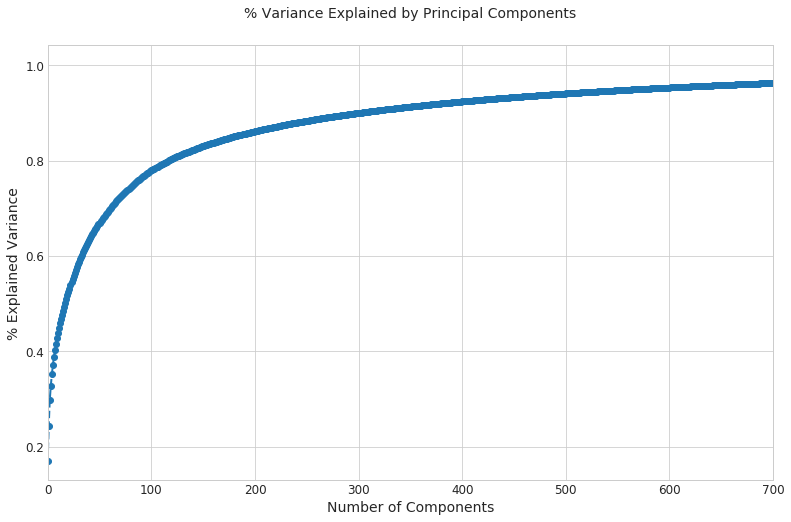

In [71]:
sns.set_style('whitegrid')
plt.figure(1, figsize=(13, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'--o', linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Components',size=14)
plt.xticks(size=12)
plt.xlim([0,700])
plt.ylabel('% Explained Variance',size=14)
plt.yticks(size=12)
plt.title('% Variance Explained by Principal Components',size=14,y=1.05)
plt.show()

#### Does not make a lot of sense to test PCA, as we will be working with higher number of features than with feature selection.

In [79]:
[np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)][0]

(array([ 301,  302,  303, ..., 4683, 4684, 4685]),)

In [81]:
pca=PCA(n_components=301,whiten=True,random_state=0)
X_pca_21=pca.fit_transform(scaled_X)
print("Variance explained using 301 components is:",sum(pca.explained_variance_ratio_))

Variance explained using 301 components is: 0.89957801064


In [82]:
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_21,y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [83]:
## Table to store training and test measures so we can compare later
table_80_70_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_70_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='3.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [84]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X_train.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.909939509299


Predicted  False  True  __all__
Actual                         
False      25132  2673    27805
True         260  4502     4762
__all__    25392  7175    32567

The accuracy of the model on test data is: 0.895603045935


Predicted  False  True  __all__
Actual                         
False       6257   716     6973
True         134  1035     1169
__all__     6391  1751     8142

#### <a id='3.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [85]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.914269045353


Predicted  False  True  __all__
Actual                         
False      25185  2620    27805
True         172  4590     4762
__all__    25357  7210    32567

The accuracy of the model on test data is: 0.899164824367


Predicted  False  True  __all__
Actual                         
False       6287   686     6973
True         135  1034     1169
__all__     6422  1720     8142

#### <a id='3.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [86]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_70_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_70_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.91663340191


Predicted  False  True  __all__
Actual                         
False      25202  2603    27805
True         112  4650     4762
__all__    25314  7253    32567

The accuracy of the model on test data is: 0.900024563989


Predicted  False  True  __all__
Actual                         
False       6294   679     6973
True         135  1034     1169
__all__     6429  1713     8142

In [87]:
table_80_70_test['index']=indx
table_80_70_train['index']=indx

table_80_70_test.set_index(['index'],drop=True,inplace=True)
table_80_70_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_70_train)
print("\nTest Set")
display(table_80_70_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.909940,4502.0,25132.0,2673.0,260.0,0.096134,0.054599
RandomForestClassifier,0.914269,4590.0,25185.0,2620.0,172.0,0.094228,0.036119
ExtraTreeClassifier,0.916633,4650.0,25202.0,2603.0,112.0,0.093616,0.023520



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.895603,1035.0,6257.0,716.0,134.0,0.102682,0.114628,0.891345
RandomForestClassifier,0.899165,1034.0,6287.0,686.0,135.0,0.098379,0.115483,0.893069
ExtraTreeClassifier,0.900025,1034.0,6294.0,679.0,135.0,0.097376,0.115483,0.893571


#### Lets try using oversampling (SMOTE technique) to see if we can improve the results

### <a id='4' style="text-decoration : none; color : #000000;"> 4. Oversampling</a>

In [88]:
columns=df_sel.columns[df_sel.columns!='Target'].values
print('Features we will be using:\n')
display(columns.tolist())

Features we will be using:



['number_of_cookies',
 'number_of_unsecure_cookies',
 'number_of_non_http_only_cookies',
 'dom_function_document.getElementsByTagName(',
 'number_of_http_only_cookies',
 'dom_function_document.createElement(',
 'js_function_.getTime(',
 'dom_function_window.addEventListener(',
 'number_of_secure_cookies',
 'js_function_.split(',
 'js_function_Math.random(',
 'js_function_.setTime(',
 'js_function_.replace(',
 'js_function_.indexOf(',
 'js_function_Math.floor(',
 'js_function_decodeURIComponent(',
 'js_function_.match(',
 'js_function_JSON.parse(',
 'js_function_.pop(',
 'js_function_.charAt(',
 'js_function_.concat(',
 'js_function_encodeURIComponent(',
 'js_function_.test(',
 'js_function_.apply(',
 'js_function_.substr',
 'script_src_.js',
 'script_count',
 'script_src_relative',
 'script_src_absolute',
 'script_src_https',
 'script_async_true',
 'link_rel_canonical',
 'div_count',
 'script_type_text/javascript',
 'script_src_out_of_domain',
 'iframe_count',
 'a_count',
 'a_href_rela

In [89]:
### Preparing our training and test sets
X=df[columns].values
y=df.Target.values

scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

sm = SMOTE(random_state=12, ratio = 1.0)
X_train, Y_train = sm.fit_sample(X_train, Y_train)

The train/test split ratio is 80:20


In [90]:
## Table to store training and test measures so we can compare later
table_80_80_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_80_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

#### <a id='4.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [91]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.924718254253


Predicted  False   True  __all__
Actual                          
False      24216   3646    27862
True         549  27313    27862
__all__    24765  30959    55724

The accuracy of the model on test data is: 0.877548513879


Predicted  False  True  __all__
Actual                         
False       5985   931     6916
True          66  1160     1226
__all__     6051  2091     8142

#### <a id='4.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [92]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.947275859594


Predicted  False   True  __all__
Actual                          
False      24990   2872    27862
True          66  27796    27862
__all__    25056  30668    55724

The accuracy of the model on test data is: 0.898673544584


Predicted  False  True  __all__
Actual                         
False       6178   738     6916
True          87  1139     1226
__all__     6265  1877     8142

In [93]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_count,0.183304
number_of_unsecure_cookies,0.141848
a_href_absolute,0.087472
a_href_out_of_domain,0.086134
a_href_relative,0.082797
script_count,0.077865
script_async_true,0.073515
iframe_count,0.043415
number_of_cookies,0.022705
number_of_non_http_only_cookies,0.015955


#### <a id='4.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [94]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_80_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_80_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.948119302276


Predicted  False   True  __all__
Actual                          
False      25069   2793    27862
True          98  27764    27862
__all__    25167  30557    55724

The accuracy of the model on test data is: 0.900147383935


Predicted  False  True  __all__
Actual                         
False       6202   714     6916
True          99  1127     1226
__all__     6301  1841     8142

In [95]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
number_of_cookies,0.134365
script_src_.js,0.122788
a_href_out_of_domain,0.091968
script_count,0.091037
number_of_unsecure_cookies,0.049642
number_of_non_http_only_cookies,0.045866
iframe_src_https,0.045850
script_src_https,0.036516
script_src_absolute,0.036502
iframe_src_absolute,0.035737


In [96]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [97]:
table_80_80_test['index']=indx
table_80_80_train['index']=indx

table_80_80_test.set_index(['index'],drop=True,inplace=True)
table_80_80_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_80_train)
print("\nTest Set")
display(table_80_80_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.924718,27313.0,24216.0,3646.0,549.0,0.130859,0.019704
RandomForestClassifier,0.947276,27796.0,24990.0,2872.0,66.0,0.103079,0.002369
ExtraTreeClassifier,0.948119,27764.0,25069.0,2793.0,98.0,0.100244,0.003517



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.877549,1160.0,5985.0,931.0,66.0,0.134615,0.053834,0.905776
RandomForestClassifier,0.898674,1139.0,6178.0,738.0,87.0,0.106709,0.070962,0.911164
ExtraTreeClassifier,0.900147,1127.0,6202.0,714.0,99.0,0.103239,0.080750,0.908005


### <a id='5' style="text-decoration : none; color : #000000;"> 5. Undersampling</a>

In [98]:
df_non=df_sel[df_sel.Target==0]
df_mal=df_sel[df_sel.Target==1]

df_non=df_non.sample(frac=len(df_mal)/len(df_non),random_state=0)
df_u=df_non.append(df_mal)

X=df_u[columns]
y=df_u.Target.values

feature_name = X.columns.tolist()
print("Shape after undersampling",df_u.shape)
df_u.head()

Shape after undersampling (11862, 51)


,number_of_cookies,number_of_unsecure_cookies,number_of_non_http_only_cookies,dom_function_document.getElementsByTagName(,number_of_http_only_cookies,dom_function_document.createElement(,js_function_.getTime(,dom_function_window.addEventListener(,number_of_secure_cookies,js_function_.split(,js_function_Math.random(,js_function_.setTime(,js_function_.replace(,js_function_.indexOf(,js_function_Math.floor(,js_function_decodeURIComponent(,js_function_.match(,js_function_JSON.parse(,js_function_.pop(,js_function_.charAt(,js_function_.concat(,js_function_encodeURIComponent(,js_function_.test(,js_function_.apply(,js_function_.substr,script_src_.js,script_count,script_src_relative,script_src_absolute,script_src_https,script_async_true,link_rel_canonical,div_count,script_type_text/javascript,script_src_out_of_domain,iframe_count,a_count,a_href_relative,a_href_absolute,a_href_out_of_domain,img_count,meta_http-equiv_X-UA-Compatible,link_href_https,img_src_relative,img_src_absolute,img_src_https,iframe_src_absolute,iframe_src_relative,link_rel_shortcut icon,iframe_src_https,Target
domain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
vpnmentor.com,8.0,8.0,7.0,5.0,1.0,2.0,4.0,1.0,0.0,14.0,0.0,0.0,0.0,26.0,0.0,8.0,0.0,0.0,1.0,0.0,3.0,4.0,1.0,3.0,2.0,10.0,25.0,12.0,12.0,12.0,11.0,1.0,197.0,6.0,5.0,0.0,180.0,180.0,177.0,171.0,31.0,0.0,41.0,24.0,24.0,24.0,0.0,0.0,2.0,0.0,0
leilao.jp,4.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,26.0,15.0,15.0,6.0,12.0,0.0,12.0,10.0,5.0,8.0,146.0,146.0,146.0,143.0,120.0,0.0,1.0,120.0,120.0,2.0,3.0,3.0,0.0,3.0,0
tnea.ac.in,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
xiaoman.cn,7.0,7.0,7.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,7.0,13.0,9.0,9.0,2.0,5.0,0.0,135.0,2.0,4.0,0.0,113.0,112.0,109.0,106.0,14.0,1.0,0.0,14.0,14.0,4.0,0.0,0.0,0.0,0.0,0
hawaiinewsnow.com,15.0,15.0,15.0,2.0,0.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,29.0,97.0,40.0,40.0,17.0,22.0,1.0,790.0,43.0,3.0,18.0,605.0,590.0,584.0,530.0,190.0,1.0,9.0,72.0,72.0,19.0,5.0,5.0,0.0,2.0,0


In [99]:
class_bal(df_u)

In [100]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

print("The train/test split ratio is 80:20")
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,y,random_state=0,test_size=0.2)

## Table to store training and test measures so we can compare later
table_80_90_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_90_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR','auc'])

The train/test split ratio is 80:20


#### <a id='5.A' style="text-decoration : none; color : #000000;"> A.  Neural Networks using keras</a>

In [101]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=X.shape[1]))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=20,verbose=False)

acc_train=deep_learning.evaluate(X_train,Y_train,verbose=False)[1]
print("The accuracy of the model on training data is:",acc_train)
cm_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_train)
acc_test=accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False))
print("The accuracy of the model on test data is:",acc_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test, deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[0]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[0]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is: 0.915059542653


Predicted  False  True  __all__
Actual                         
False       4117   655     4772
True         151  4566     4717
__all__     4268  5221     9489

The accuracy of the model on test data is: 0.889169827223


Predicted  False  True  __all__
Actual                         
False        962   197     1159
True          66  1148     1214
__all__     1028  1345     2373

#### <a id='5.B' style="text-decoration : none; color : #000000;"> B.  Random Forest Classifier</a>

In [102]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X_train,Y_train)
acc_train=rf.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",rf.score(X_train,Y_train))
cm_train=get_cm(rf,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,rf.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(rf,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,rf.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[1]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[1]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.94551586047


Predicted  False  True  __all__
Actual                         
False       4294   478     4772
True          39  4678     4717
__all__     4333  5156     9489

The accuracy of the model on test data is: 0.895069532238


Predicted  False  True  __all__
Actual                         
False        985   174     1159
True          75  1139     1214
__all__     1060  1313     2373

In [103]:
f_r=pd.DataFrame(rf.feature_importances_,index=columns)
f_r.columns=['Feature Importance']
f_r.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_r

,Feature Importance
a_count,0.187847
a_href_out_of_domain,0.091920
script_count,0.082224
a_href_absolute,0.080916
a_href_relative,0.080914
script_src_relative,0.076260
number_of_unsecure_cookies,0.073464
script_src_.js,0.073218
iframe_count,0.042123
number_of_cookies,0.026541


#### <a id='5.C' style="text-decoration : none; color : #000000;"> C.  Extra Tree Classifier</a>

In [104]:
ext_tree=ExtraTreesClassifier(random_state=0)
ext_tree.fit(X_train,Y_train)
acc_train=ext_tree.score(X_train,Y_train)
print("The accuracy of the model on training data is: ",ext_tree.score(X_train,Y_train))
cm_train=get_cm(ext_tree,X_train,Y_train)
display(cm_train)
acc_test=accuracy_score(Y_test,ext_tree.predict(X_test))
print("The accuracy of the model on test data is:",acc_test)
cm_test=get_cm(ext_tree,X_test,Y_test)
display(cm_test)
fpr, tpr, threshold = roc_curve(Y_test,ext_tree.predict(X_test))
auc=metrics.auc(fpr, tpr)

table_80_90_train.loc[2]=([acc_train,cm_train.TP,cm_train.TN,cm_train.FP,cm_train.FN,cm_train.FPR,cm_train.FNR])
table_80_90_test.loc[2]=([acc_test,cm_test.TP,cm_test.TN,cm_test.FP,cm_test.FN,cm_test.FPR,cm_test.FNR,auc])

The accuracy of the model on training data is:  0.94920434187


Predicted  False  True  __all__
Actual                         
False       4312   460     4772
True          22  4695     4717
__all__     4334  5155     9489

The accuracy of the model on test data is: 0.899283607248


Predicted  False  True  __all__
Actual                         
False       1000   159     1159
True          80  1134     1214
__all__     1080  1293     2373

In [105]:
f_e=pd.DataFrame(ext_tree.feature_importances_,index=columns)
f_e.columns=['Feature Importance']
f_e.sort_values(by='Feature Importance',ascending=False,inplace=True)
f_e

,Feature Importance
script_src_.js,0.134746
number_of_cookies,0.095371
script_count,0.077399
div_count,0.069887
a_href_out_of_domain,0.057876
script_src_absolute,0.049916
number_of_non_http_only_cookies,0.048322
number_of_unsecure_cookies,0.041643
script_src_out_of_domain,0.039684
link_rel_canonical,0.035951


In [106]:
avg_feat_impt=(pd.concat((f_r,f_e), axis=1).mean(axis=1).sort_values(ascending=False))

feat_impt_plot(avg_feat_impt[0:20],title='Average Feature Importance')

In [107]:
table_80_90_test['index']=indx
table_80_90_train['index']=indx

table_80_90_test.set_index(['index'],drop=True,inplace=True)
table_80_90_train.set_index(['index'],drop=True,inplace=True)

print("Training Set")
display(table_80_90_train)
print("\nTest Set")
display(table_80_90_test)

Training Set


,accuracy,TP,TN,FP,FN,FPR,FNR
index,,,,,,,
Neural_Network,0.915060,4566.0,4117.0,655.0,151.0,0.137259,0.032012
RandomForestClassifier,0.945516,4678.0,4294.0,478.0,39.0,0.100168,0.008268
ExtraTreeClassifier,0.949204,4695.0,4312.0,460.0,22.0,0.096396,0.004664



Test Set


,accuracy,TP,TN,FP,FN,FPR,FNR,auc
index,,,,,,,,
Neural_Network,0.889170,1148.0,962.0,197.0,66.0,0.169974,0.054366,0.887830
RandomForestClassifier,0.895070,1139.0,985.0,174.0,75.0,0.150129,0.061779,0.894046
ExtraTreeClassifier,0.899284,1134.0,1000.0,159.0,80.0,0.137187,0.065898,0.898457


In [108]:
## Original Creator : Darshan Bhansali
## HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')